# Prima lezione di laboratorio

## Esercizio 1

### Esercizio 1.1

La parte 1 dell'esercizio 1 consiste nel calcolare il valor medio della funzione $\langle r \rangle = \frac{1}{b-a} \int_a^b f(r) dr= \int_0^1 r dr = 1/2$ . Questo integrale è stato calcolato numericamente con il metodo montecarlo della media. In particolare sono state ottenute $N=100$ stime dell'integrale ${\{\langle I \rangle_{i}\}}_{i=1}^{N=100}$, ciascuna delle quali calcolata con $L=100$ estrazioni, ovvero $${\langle I \rangle}_{i} = \frac{1}{L}\sum_{j=1}^{L=100} f(r_j) = \frac{1}{L}\sum_{j=1}^{L=100} r_j$$ con $r_j$ numero random estratto con distribuzione uniforme nell'intervallo $[0, 1]$.
È poi stata calcolata la media delle $N=100$ stime ottenute $\langle r \rangle = \frac{1}{N} \sum_{i=1}^{N=100} \langle I \rangle_i$ e la loro deviazione standard (deviazione standard della media) $$\sigma_m \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^{N=100} {\langle I \rangle}^2_i - \left( \frac{1}{N} \sum_{i=1}^{N=100} \langle I \rangle_i \right)^2 \right]} $$
Il procedimento di ottenere la stima di una grandezza dividendo i suoi valori stimati in blocchi, calcolando la media di ogni blocco e poi la medie delle medie e la deviazione standard delle medie prende il nome di *blocking method*.

Nel grafico sottostante è stato rappresentato il valore $\langle r \rangle$ con relativa barra di errore $\sigma_m$ all'aumentare del numero di blocchi presi in considerazione, e quindi del numero totale di estrazioni effettuate per ottenere tale stima. È stato confrontato con il valore atteso $\frac{1}{2}$.

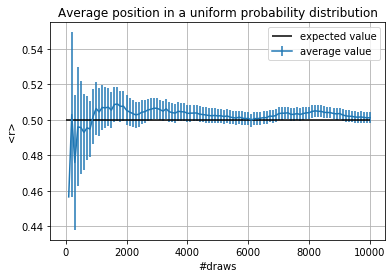

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, f, error = np.loadtxt("ave.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, label='average value')
plt.hlines(0.5, 0, 10000, label='expected value')
plt.title('Average position in a uniform probability distribution')
plt.xlabel('#draws')
plt.ylabel('<r>')
plt.grid(True)
plt.legend()
plt.show()

### Esercizio 1.2

La parte 2 dell'esercizio 1 consiste nel calcolare la varianza della funzione il cui valor medio è stato calcolato nella parte 1 dell'esercitazione. Tale valore si ottiene per definizione da $\sigma^2 = \langle {\bigl (r- \frac{1}{2} \bigr ) }^2 \rangle = \int_0^1 \bigl (r-\frac{1}{2} \bigr)^2 dr = \frac{1}{12}$. Il procedimento che è stato seguito è identico a quello della parte 1, con l'unica differenza che la funzione presa in considerazione è stata $f(r)=\bigl ( r - \frac{1}{2} \bigr)^2$.

Nel grafico sottostante è stato rappresentato il valore $\langle \bigl ( r - \frac{1}{2} \bigr)^2 \rangle$ con relativa barra di errore $\sigma_m$ all'aumentare del numero di blocchi presi in considerazione, e quindi del numero totale di estrazioni effettuate per ottenere tale stima.
È stato confrontato con il valore atteso $\frac{1}{12}$.

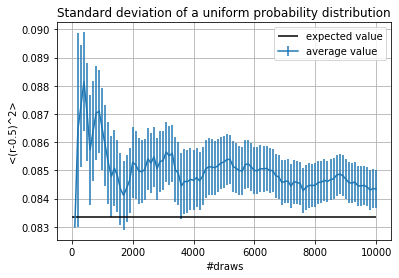

In [10]:
x, f, error = np.loadtxt("sigma.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, label='average value')
plt.hlines(1/12, 0, 10000, label='expected value')
plt.xlabel('#draws')
plt.ylabel('<(r-0.5)^2>')
plt.title('Standard deviation of a uniform probability distribution')
plt.grid(True)
plt.legend()
plt.show()

### Esercizio 1.3

La parte 3 dell'esercizio 1 consiste nella verifica tramite test del $\chi^2$ dell'ipotesi che il generatore di numeri random, quando richiesto, estragga realmente valori con distribuzione uniforme nell'intervallo $[0, 1]$. L'implementazione che è stata fatta di tale test consiste nello svolgere $N_{esp}=100$ esperimenti e per ognuno di essi ottenere un valore di $\{\chi^2_i\}_{i=1}^{Nesp=100}$. In ogni esperimento l'intervallo $[0, 1]$ è stato suddiviso in $M=100$ sottointervalli di uguale ampiezza. Per ogni sottointervallo considerato sono state fatte $N=10000$ estrazioni di un valore con distribuzione uniforme in $[0, 1]$ e sono state contate il numero di volte $N_{hit}$ in cui tale valore è ricaduto all'interno del sottointervallo considerato. La variabile $N_{hit}$ segue quindi una distribuzione binomiale con probabilità attesa che un'estrazione ricada all'interno del sottointervallo di $\frac{1}{M}=0,01$ e perciò valore atteso di $N_{hit}$ pari a $\frac{N}{M}$ e varianza $\sigma^2=\frac{N}{M}$ (nel nostro caso è stato sensato considerare la varianza solo al primo ordine in $\frac{1}{M}$, poiché la correzione successiva sarebbe stata di 2 ordini di grandezza inferiore, e quindi trascurabile).

La variabile $\chi^2$ è definita come $\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{\sigma^2_i}$ dove O è il valore osservato, E il valore atteso, $\sigma$ la deviazione standard associata al valore atteso e l'indice i corre su tutte le osservazioni che sono state fatte. Nel nostro caso, in particolare, O ed E si sono riferiti al valore atteso e osservato di $N_{hit}$ e la varianza ha avuto lo stesso valore di E.
Quindi infine si ottiene per l'i-esimo esperimento $$\chi^2_i = \sum_{j=1}^{M=100} \chi^2_ {ij} = \sum_{j=1}^{M=100} \frac{(N_{hit j}-\frac{L}{M})^2}{\frac{L}{M}}$$

Nel grafico sottostante è rappresentato il valore di $\chi^2_i$ per ognuno degli $N_{esp}$ svolti. È stato confrontato con il valore atteso 100.

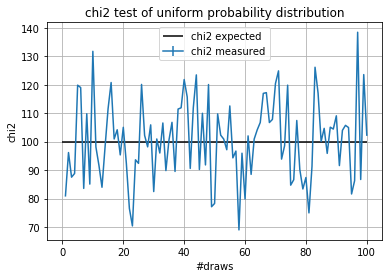

In [11]:
x, f = np.loadtxt("chi2.txt", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,f,0, label='chi2 measured')
plt.hlines(100, 0, 100, label='chi2 expected')
plt.xlabel('#draws')
plt.ylabel('chi2')
plt.title('chi2 test of uniform probability distribution')
plt.grid(True)
plt.legend()
plt.show()

## Esercizio 2

Nella prima parte dell'esercizio 2 è stata generata una variabile random $N=10000$ volte con la stessa distribuzione di probabilità dell'esito del lancio di un dado a 6 facce, ovvero la variabile può assumere i valori dei numeri naturali da 1 a 6 compresi, e ciascun esito ha probabilità $\frac{1}{6}$. L'implementazione di questa funzione consiste nel suddividere l'intervallo $[0, 1]$ in 6 sottointervalli di uguale ampiezza, generare un numero nell'intervallo $[0, 1]$ con distribuzione uniforme e associare ad ogni sottointervallo uno dei 6 possibili esiti dell'esperimento, che sono quindi equiprobabili.
Sono state poi generate 3 variabili random $N=10000$ volte ciascuna, ottenute facendo la media di 2, 10 e 100 variabili ottenute come sopra.
All'aumentare del numero $M$ di variabili che vengono mediate (tutte identiche con valor medio $\mu$ con varianza finita $\sigma^2$), per il teorema del limite centrale, la distribuzione converge ad una distribuzione normale con valor medio pari a $\mu$ e varianza pari a $\frac{\sigma^2}{M}$.

Negli istogrammi sottostanti è possibile vedere i 10000 valori delle 4 variabili raggruppati nelle varie colonne.
Per quanto detto sopra, nell'ultima figura (media di 100 variabili) è stato fatto un fit con una distribuzione normale.

optimized parameters [a,b,c] =
[8.64024537e+02 2.45381113e-01 3.50181303e+00]
parameters uncertainty =
[2.11912540e+01 6.94930198e-03 4.91389706e-03]


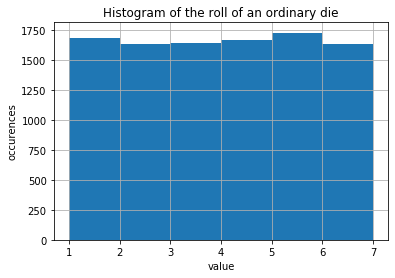

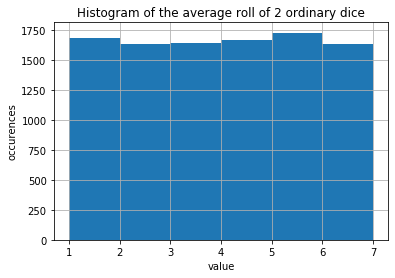

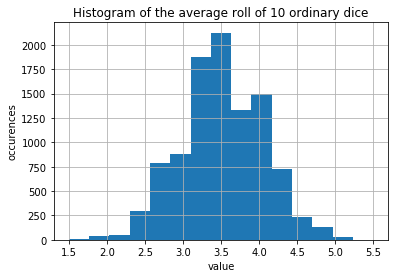

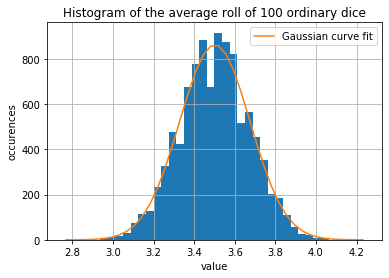

In [24]:
from scipy.optimize import curve_fit

def f(x,a,b,c):
    return a * np.exp(-((x-c)/b)**2)

n_bins=6
die = np.loadtxt("die.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(die, n_bins, range=(1,7))

plt.xlabel('value')
plt.ylabel('occurences')
plt.title('Histogram of the roll of an ordinary die')
plt.grid(True)

n_bins=6
plt.figure()
plt.xlabel('value')
plt.ylabel('occurences')
plt.title('Histogram of the average roll of 2 ordinary dice')
die2 = np.loadtxt("die.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(die2, n_bins, range=(1,7))
plt.grid(True)

n_bins=15
plt.figure()
plt.xlabel('value')
plt.ylabel('occurences')
plt.title('Histogram of the average roll of 10 ordinary dice')
die10 = np.loadtxt("die10.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(die10, n_bins, range=(1.5, 5.5))
plt.grid(True)

n_bins=40
plt.figure()
plt.xlabel('value')
plt.ylabel('occurences')
plt.title('Histogram of the average roll of 100 ordinary dice')
die100 = np.loadtxt("die100.txt", usecols=(0), delimiter=' ', unpack='true')
plt.grid(True)
a=2.75
b=4.25
n, bins, patches = plt.hist(die100, n_bins, range=(a, b))
x=np.zeros(n_bins)
for i in range(n_bins):
    x[i]=bins[i]+(b-a)/2/n_bins
y=n

p_opt, p_cov = curve_fit(f, x, y, bounds=([0,0,3],[2000,0.7,4]))
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit, label='Gaussian curve fit')
plt.legend()

print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))



plt.show()

Nella seconda parte dell'esercizio 2 è stata generata una variabile random $N=10000$ volte con distribuzione di probabilità esponenziale $p(x)=e^{-x}$. L'implementazione di questa funzione consiste nell'estrarre un variabile random $x_1$ con distribuzione uniforme in $[0, 1]$ e, utilizzando il metodo dell'inversa della funzione cumulativa, ottenere una variabile $x_2$ con distribuzione esponenziale. In particolare la relazione che lega queste due variabili è $x_2 = -\ln(1-x_1)$ .
Sono state poi generate 3 variabili random $N=10000$ volte ciascuna, ottenute facendo la media di 2, 10 e 100 variabili ottenute come sopra.
All'aumentare del numero $M$ di variabili che vengono mediate (tutte identiche con valor medio $\mu$ con varianza finita $\sigma^2$), per il teorema del limite centrale, la distribuzione converge ad una distribuzione normale con valor medio pari a $\mu$ e varianza pari a $\frac{\sigma^2}{M}$.

Negli istogrammi sottostanti è possibile vedere i 10000 valori delle 4 variabili raggruppati nelle varie colonne.
Per quanto detto sopra, nell'ultima figura (media di 100 variabili) è stato fatto un fit con una distribuzione normale.

optimized parameters [a,b,c] =
[4.06953385e+02 1.38234358e-01 9.93973800e-01]
parameters uncertainty =
[4.59091550e+00 1.82158033e-03 1.27136964e-03]


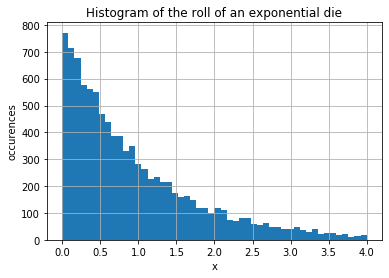

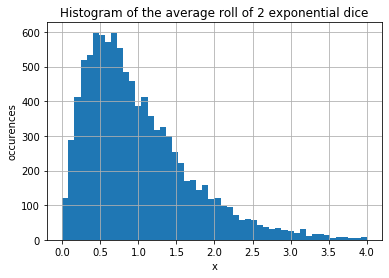

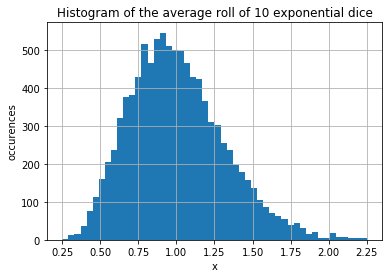

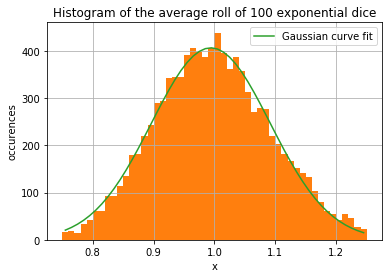

In [25]:
def f(x,a,b,c):
    return a * np.exp(-((x-c)/b)**2)

n_bins=50
exp = np.loadtxt("exp.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(exp, n_bins, range=(0,4))

plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the roll of an exponential die')
plt.grid(True)

plt.figure()
plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the average roll of 2 exponential dice')
exp2 = np.loadtxt("exp2.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(exp2, n_bins, range=(0,4))
plt.grid(True)

plt.figure()
plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the average roll of 10 exponential dice')
exp10 = np.loadtxt("exp10.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(exp10, n_bins, range=(0.25,2.25))
plt.grid(True)

plt.figure()
plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the average roll of 100 exponential dice')
exp100 = np.loadtxt("exp100.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(exp100, n_bins, range=(0.75,1.25))
plt.grid(True)
a=0.75
b=1.25
n, bins, patches = plt.hist(exp100, n_bins, range=(a, b))
x=np.zeros(n_bins)
for i in range(n_bins):
    x[i]=bins[i]+(b-a)/2/n_bins
y=n

p_opt, p_cov = curve_fit(f, x, y, bounds=([300,0,0.8],[500,0.5,1.2]))
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit, label='Gaussian curve fit')
plt.legend()

print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))


plt.show()

Nella terza parte dell'esercizio 2 è stata generata una variabile random $N=10000$ volte con distribuzione di probabilità lorentziana $p(x)=\frac{1}{\pi(1+x^2)}$. L'implementazione di questa funzione consiste nell'estrarre un variabile random $x_1$ con distribuzione uniforme in $[0, 1]$ e, utilizzando il metodo dell'inversa della funzione cumulativa, ottenere una variabile $x_2$ con distribuzione esponenziale. In particolare la relazione che lega queste due variabili è $x_2 = \tan(\pi(x-\frac{1}{2}))$ .
Sono state poi generate 3 variabili random $N=10000$ volte ciascuna, ottenute facendo la media di 2, 10 e 100 variabili ottenute come sopra.
All'aumentare del numero $M$ di variabili che vengono mediate (tutte identiche con valor medio $\mu$, ma con varianza non finita), non è applicabile il teorema del limite centrale, la distribuzione non converge ad una distribuzione normale ma converge invece ad una distribuzione lorentziana.

Negli istogrammi sottostanti è possibile vedere i 10000 valori delle 4 variabili raggruppati nelle varie colonne.
Per quanto detto sopra, nell'ultima figura (media di 100 variabili) è stato fatto un fit con una distribuzione lorentziana.

optimized parameters [a,b,c] =
[5.00000000e+02 8.14436766e-01 2.41411603e-03]
parameters uncertainty =
[21.51599548  0.04960248  0.03480762]


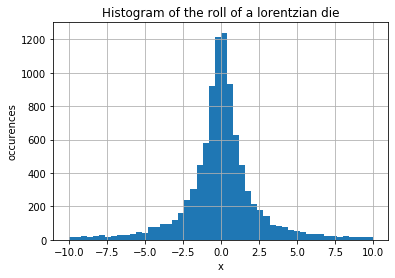

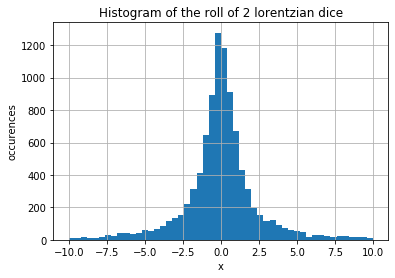

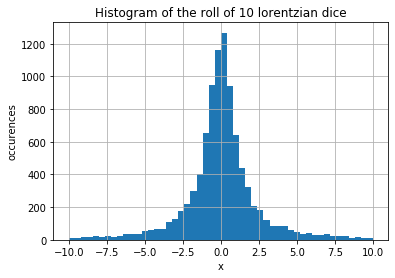

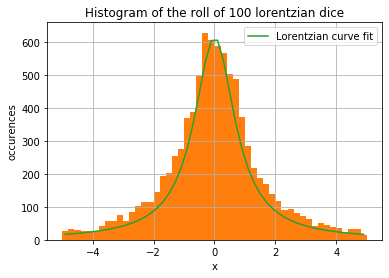

In [29]:
def f(x,a,b,c):
    return a*b/((x-c)**2+b**2)

n_bins=50
lor = np.loadtxt("lor.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(lor, n_bins, range=(-10,10))

plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the roll of a lorentzian die')
plt.grid(True)

plt.figure()
plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the roll of 2 lorentzian dice')
lor2 = np.loadtxt("lor2.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(lor2, n_bins, range=(-10,10))
plt.grid(True)

plt.figure()
plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the roll of 10 lorentzian dice')
lor10 = np.loadtxt("lor10.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(lor10, n_bins, range=(-10,10))
plt.grid(True)

plt.figure()
plt.xlabel('x')
plt.ylabel('occurences')
plt.title('Histogram of the roll of 100 lorentzian dice')
lor100 = np.loadtxt("lor100.txt", usecols=(0), delimiter=' ', unpack='true')
n, bins, patches = plt.hist(lor100, n_bins, range=(-5, 5))

plt.grid(True)
a=-5
b=5
n, bins, patches = plt.hist(lor100, n_bins, range=(a, b))
x=np.zeros(n_bins)
for i in range(n_bins):
    x[i]=bins[i]+(b-a)/2/n_bins
y=n

p_opt, p_cov = curve_fit(f, x, y, bounds=([300,0,-5],[500,5,5]))
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,y_fit, label='Lorentzian curve fit')
plt.legend()

print("optimized parameters [a,b,c] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

plt.show()

## Esercizio 3

L'esercizio 3 consiste nel dare una stima di $\pi$ simulando il lancio di uno stuzzicadente di lunghezza $d$ su un tavolo dove è presente una griglia uniforme nella direzione delle y con spaziatura $L$. In particolare $\pi = \frac{2L}{Pd}$, dove $P$ è la probabilità che lo stuzzicadente lanciato cada sovrapponendosi a una riga della griglia.

Sono stati svolti $M=100$ gruppi di esperimenti, e ognuno di questi fornisce una stima $\{\pi_i\}_{i=1}^{M=100}$. Ciascuno gruppo è formato da $N_{esp}=100$ esperimenti e la stima per il gruppo è stata ottenuta dalla media delle stime dei singoli esperimenti $\pi_i = \frac{1}{N_{esp}}\sum_{j=1}^{Nesp=100} \pi_{ij}$ . Ogni esperimenti consiste in $N=10000$ lanci dello stuzzicadente e perciò $\pi_{ij} = \frac{2LN}{N_{hit j}d}$, dove $N_{hit j}$ è il numero di volte in cui lo stuzzicadente è caduta su una riga durante il j-esimo esperimento dell'i-esimo gruppo di esperimenti. È poi stata calcolata la media delle $M=100$ stime ottenute $\pi = \frac{1}{M} \sum_{i=1}^{M=100} \pi_i$ e la loro deviazione standard (deviazione standard della media) $$\sigma_m \simeq \sqrt{\frac{1}{M-1} \left[ \frac{1}{M} \sum_{i=1}^{M=100} \pi^2_i - \left( \frac{1}{M} \sum_{i=1}^{M=100} \pi_i \right)^2 \right]} $$

Di seguito viene riportata la descrizione esplicita dell'implementazione della simulazione del lancio dello stuzzicadente sulla griglia.

Si denotano con $(x_1, y_1)$ e $(x_2, y_2)$ le coordinate rispettivamente del primo e del secondo estremo dello stuzzicadente.
Visto che la griglia è invariante sotto traslazioni nella direzione $x$, allora $x_1$ dipende solamente dal sistema di coordinate scelto, e perciò viene posto $x_1=0$ senza perdita di generalità.
Visto che la griglia è invariante sotto traslazioni di modulo multiplo intero di $d$, allora ci sono 2 possibilità: y_1 cadrà esattamente sulla riga, e perciò lo stuzzicadente viene immediatamente conteggiato, oppure cadrà tra una riga e l'altra. Gli spazi tra due righe successive sono tutti equivalenti, quindi, ponendo la prima riga della griglia in $y=0$, $y_1$ può essere estratto uniformemente nell'intervallo $[0, d]$ senza perdita di generalità.
A questo punto allo stuzzicadente rimane un unico grado di libertà, che può essere eliminato dall'estrazione dell'angolo $\theta$ che lo stuzzicadente forma con l'asse delle $x$. Questo definisce univocamente la posizione del secondo estremo, che è a distanza $L$ fissata dal primo, e perciò giace sulla circonferenza centrata in $(x_1, y_1)$ e di raggio $L$. Tuttavia, per fare ciò sarebbe necessario estrarre $\theta$ uniformemente nell'intervallo $[0, 2\pi]$, il che richiederebbe l'utilizzo del valore $\pi$ durante la sua stima, cosa che vuole essere evitata. Si è deciso quindi di estrarre il secondo estremo uniformemente all'interno del quadrato circoscritto alla circonferenza sopra citata, ovvero $x_2$ estratto uniformemente in $[-L, L]$ e $y_2$ estratto uniformemente in $[y_1-L, y_1+L]$. Questo punto viene accettato se ricade all'interno della circonferenza, e rigettato in caso contrario. In questo modo, i punti accettati sono distribuiti uniformemente all'interno del cerchio. Preso un punto accettato, non resta quindi che proiettarlo lungo il raggio fino all'intersezione con la circonferenza, che consiste in una semplice similitudine tra triangoli e non necessita dell'utilizzo del valore di $\pi$.
Infine, lo stuzzicadente caduto è sovrapposto ad una delle righe della griglia se la coordinate $y_2$ trovata è esterna all'intervallo $[0, d]$, e viene perciò conteggiato in $N_{hit}$.

Nel grafico sottostante è stato rappresentato il valore di $\pi$ con relativa barra di errore $\sigma_m$ all'aumentare del numero di gruppi di esperimenti (blocchi) presi in considerazione, e quindi del numero totale di lanci effettuati per ottenere tale stima. È stato confrontato con il valore atteso noto.

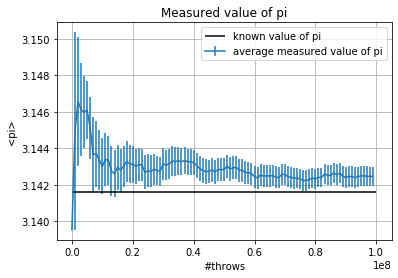

In [33]:
x, f, error = np.loadtxt("pigreco.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, f,yerr=error, label='average measured value of pi')
plt.hlines(math.pi, 0, 100000000, label='known value of pi')
plt.xlabel('#throws')
plt.ylabel('<pi>')
plt.title('Measured value of pi')
plt.grid(True)
plt.legend()
plt.show()